# Predicting Handwritten Numbers using a Neural Network and the MNIST Dataset

#### In this exercise I will be using a neural network to predict the integer value of handwritten numbers. These numbers range from 0-9. The numbers are stored as 28x28 black and white images and are accessed from the MNIST Database. There are 70,000 images in total. In theory, once the network is trained, I will 'feed' the neural network and image of a handwritten number, and the network will 'read' the number tell me what number it 'sees'.

In [1]:
import tensorflow as tf          # TensorFlow includes Keras, which is a user friendly way to build and run neural networks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# dataset = 28x28 pixel images of handwritten numbers 0 - 9. A default image library stored in Keras

mnist = tf.keras.datasets.mnist

In [3]:
# loading dataset and splitting into train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape       # 60,000 items of 28x28 arrays

(60000, 28, 28)

In [5]:
x_test.shape       

(10000, 28, 28)

In [6]:
y_train.shape       # 60,000 integer labels, telling us what the handwritten number is supposed to be

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
# seeing what the first entry in the dataset looks like.
# Data is a 2D array

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

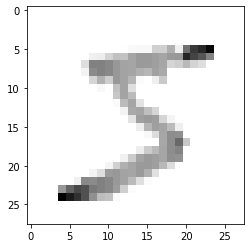

In [21]:
# using a heatmap to visulaise that first entry as a handwritten number

plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [10]:
# seeing what the value label for the first entry is

y_train[0]

5

In [11]:
# scaling / normalising the data to be between 0-1
# not essential, but helps the neural network work better

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
       ### defining the model ### 

model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten())

# hidden layers (128 neurons in the layer, using reLu as our activation function as it's a good default)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# output layer (needs the number of classifications. here, 10 (0-9). Softmax used for probability distribution)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

       ### model shape is a 784-128-128-10 neural network ###

    
# defining parameters for training the model
# adam optimizer is again a good default / go-to optimizer
# neural network doesnt try to optimise accuracy, instead minimise loss. Categorical crossentropy is a popular choice 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Training the model

model.fit(x_train, y_train, epochs=3)    # epochs is the number of iterations the model runs through the training dataset

Epoch 1/3
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2634 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1075 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0717 - acc: 0.9778


#### model achieved a 97.8% accuracy with a loss of 0.072 on the training dataset

In [14]:
# evaluating the neural network on the test dataset

val_loss, val_acc = model.evaluate(x_test, y_test)
print(round(val_loss,4), round((val_acc*100),3),'%')

10000/10000 [==============================] - 1s 62us/sample - loss: 0.1037 - acc: 0.9671
0.1037 96.71 %


#### model achieved a 96.7% accuracy with a loss of 0.104 on the test dataset

### Visualising the predictions

In [15]:
predictions = model.predict([x_test])

# storing the predictions as a list to be able to plot confusion matrix later

predictions_list = []

for i in range(0,10000):
    x = np.argmax(predictions[i])
    predictions_list.append(x)

# shows the probabilities from the network for each number for the first 9 handwritten numbers in the test dataset 
print(predictions[0:9])   

[[1.02879973e-07 2.29073720e-07 2.31364887e-04 2.07060156e-03
  5.93758209e-10 7.62002003e-07 7.30396993e-12 9.97690797e-01
  4.01849275e-06 2.20133916e-06]
 [1.75928641e-08 9.43100968e-05 9.99784052e-01 1.18321936e-04
  7.45468465e-10 8.38351468e-07 5.38720144e-08 1.58448155e-09
  2.41060866e-06 1.04847506e-10]
 [1.41961269e-08 9.99495268e-01 5.48590324e-05 7.96711538e-06
  3.07164519e-05 5.04708123e-06 6.07590073e-06 2.37677959e-05
  3.75889067e-04 3.87332932e-07]
 [9.99875665e-01 1.47620796e-07 9.48712477e-06 5.44928298e-07
  5.95456186e-07 3.65548522e-06 2.33880874e-05 7.06034768e-07
  6.06261437e-07 8.52339363e-05]
 [1.05946924e-07 3.61673210e-06 2.07206449e-05 4.12206737e-06
  9.97367442e-01 1.70936437e-05 8.91308275e-07 1.37190927e-05
  2.34989100e-04 2.33728904e-03]
 [1.71257888e-08 9.99701023e-01 6.05742025e-06 4.65277299e-06
  3.89167944e-05 8.02015336e-07 9.18049182e-07 1.16928160e-04
  1.29284323e-04 1.38606231e-06]
 [1.27770361e-09 3.54255099e-06 4.73446136e-08 8.67099880e

In [16]:
# printing the predictions in a readable format. Using argmax to return the number with the highest probability 

predictions_list[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 5]

In [17]:
# what were the correct asignments to these handwritten numbers?

print(y_test[:9])

[7 2 1 0 4 1 4 9 5]


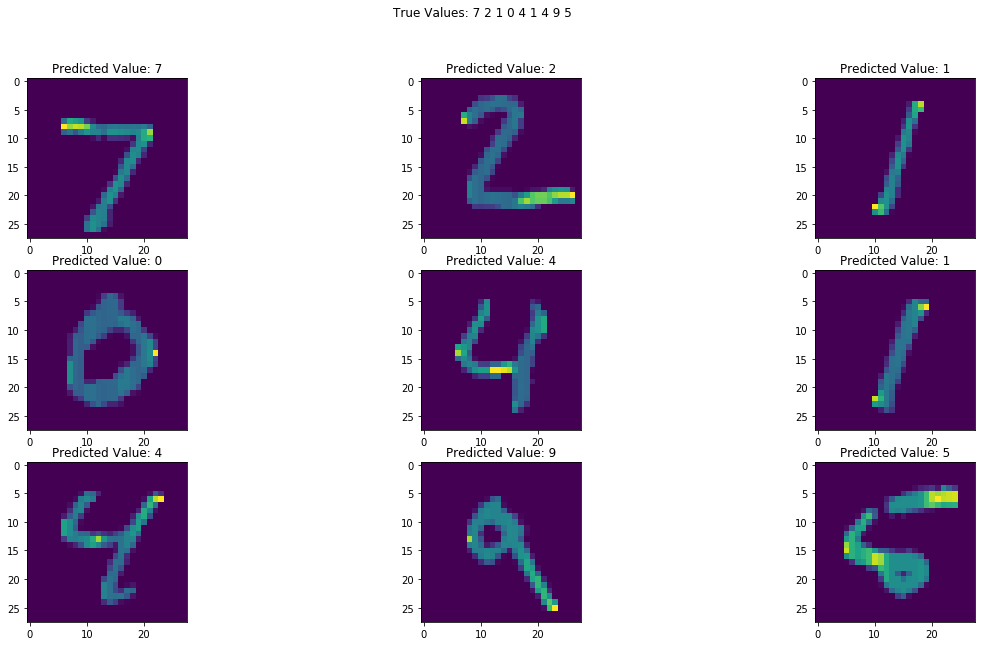

In [18]:
# Visualising the first 9 handwritten numbers vs what the model predicted

fig, ax = plt.subplots(3,3,figsize=(20,10))
#'Index Position 0. Model Predicted:',
ax[0,0].imshow(x_test[0])
ax[0,0].set_title('Predicted Value: {}'.format(predictions_list[0]))

ax[0,1].imshow(x_test[1])
ax[0,1].set_title('Predicted Value: {}'.format(predictions_list[1]))

ax[0,2].imshow(x_test[2])
ax[0,2].set_title('Predicted Value: {}'.format(predictions_list[2]))

ax[1,0].imshow(x_test[3])
ax[1,0].set_title('Predicted Value: {}'.format(predictions_list[3]))

ax[1,1].imshow(x_test[4])
ax[1,1].set_title('Predicted Value: {}'.format(predictions_list[4]))

ax[1,2].imshow(x_test[5])
ax[1,2].set_title('Predicted Value: {}'.format(predictions_list[5]))

ax[2,0].imshow(x_test[6])
ax[2,0].set_title('Predicted Value: {}'.format(predictions_list[6]))

ax[2,1].imshow(x_test[7])
ax[2,1].set_title('Predicted Value: {}'.format(predictions_list[7]))

ax[2,2].imshow(x_test[8])
ax[2,2].set_title('Predicted Value: {}'.format(predictions_list[8]))


plt.suptitle('True Values: 7 2 1 0 4 1 4 9 5')
plt.show()

### Plotting the Results as a Confusion Matrix

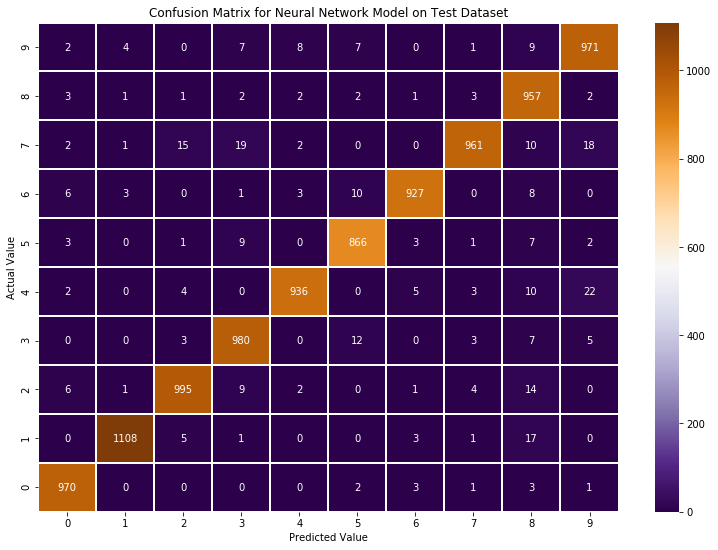

In [19]:
# import sklearn for metrics method
from sklearn import metrics

# storing data for confusion matrix as variable cm
cm = metrics.confusion_matrix(y_test, predictions_list)

#plotting confusion matrix
fig, ax = plt.subplots(figsize=(13,9))

sns.heatmap(cm, annot=True, linewidths=1, cmap = 'PuOr_r', fmt='g').invert_yaxis()
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for Neural Network Model on Test Dataset')

plt.show()

#### We can see from the matrix above, our model is able to achieve a large proportion of True Positives. It appears most reliable at predicting a 1 is a 1, which makes sense as this is likely the easiest number to 'model' in the network. Conversely, the model seems to struggle most with predicting 5's. This again makes sense as there is a large discrepency in the way people write 5's in general, and they can be very easily mistaken for 3's. The model achieved approx 97% accuracy on the test data. If we were to run this model on a dataset this size (70,000 entries) we would expect it to predict 2,100 of them incorrectly. Whilst 97% accuracy sounds good, it could still be improved, especailly for commercial applications where a sample size of 70,000 data points would not be uncommon, but the cost of 2,100 errors could be huge.